In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Load dataset


In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Generate meaningful features

In [4]:
df['age_squared'] = df['age'] ** 2

### Separate features and target variable

In [5]:
X = df.drop(columns=['target'])  # Assuming 'target' is the column to predict
y = df['target']

### Standardize the features

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Perform PCA for feature selection

In [7]:
pca = PCA(n_components=5) 
X_pca = pca.fit_transform(X_scaled)

### Visualize explained variance by PCA components

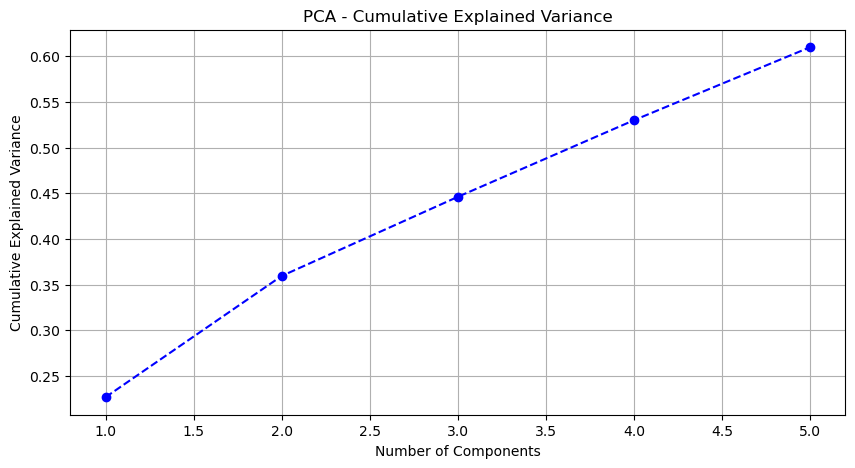

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

### Feature importance using RandomForest

In [9]:
model = RandomForestClassifier()
model.fit(X_scaled, y)
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

### Visualize feature importance

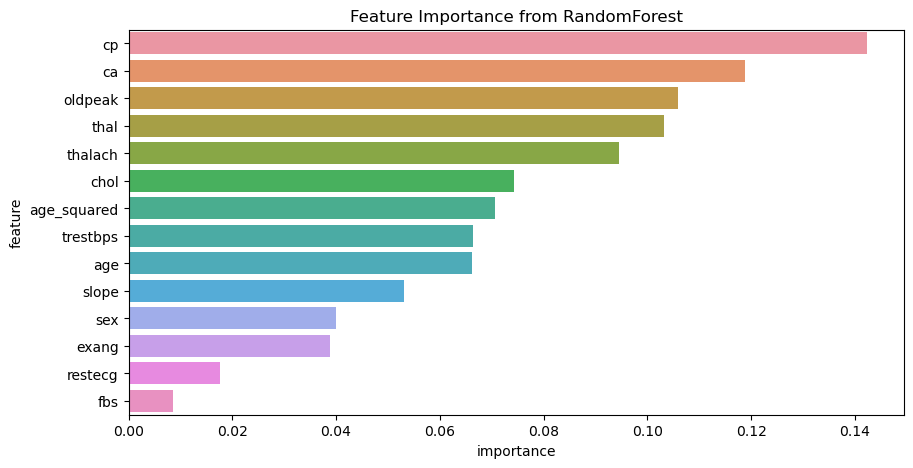

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance from RandomForest')
plt.show()

In [11]:
print("PCA Components:\n", X_pca[:5])
print("Feature Importances:\n", feature_importance_df)

PCA Components:
 [[-0.73091672 -0.71263482  0.24218374 -1.62165308 -1.03527229]
 [ 1.89719214 -2.00270556  2.18411454  1.48345728  1.00664638]
 [ 3.40271478 -1.19762901 -0.63154312  1.26069044 -1.37015272]
 [-0.05838437  0.51719543  0.08917566 -1.46641892 -1.22688127]
 [ 2.60330111  1.18453516 -0.05039098  0.46026071 -0.26078048]]
Feature Importances:
         feature  importance
2            cp    0.142250
11           ca    0.118737
9       oldpeak    0.105856
12         thal    0.103277
7       thalach    0.094531
4          chol    0.074233
13  age_squared    0.070586
3      trestbps    0.066347
0           age    0.066160
10        slope    0.053065
1           sex    0.039890
8         exang    0.038823
6       restecg    0.017613
5           fbs    0.008632


### Split data for model training and evaluation

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Train the model on the training set

In [13]:
model.fit(X_train, y_train)

RandomForestClassifier()

### Make predictions on the test set

In [14]:
y_pred = model.predict(X_test)

### Evaluate the model

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


### Detailed classification report

In [22]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### Confusion matrix

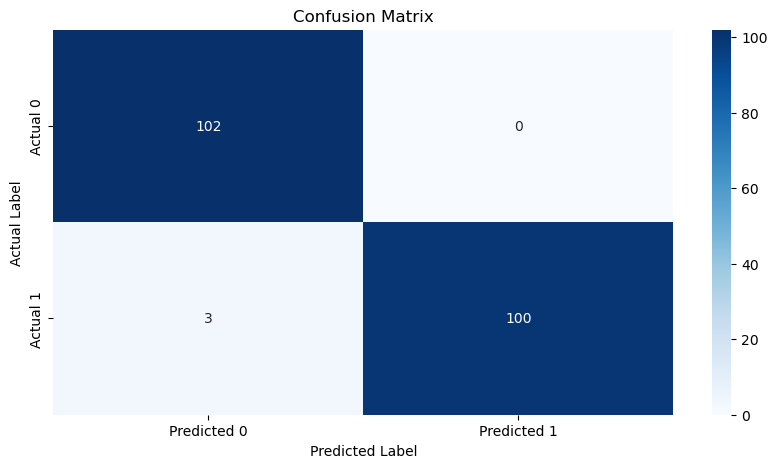

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()